##Simple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/My Drive/dataset/master.csv')
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df=df.fillna(df.mean())
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers


In [ ]:
df=df.drop(['country-year'],axis=1)

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,0.776601,"2,156,624,900",796,Boomers


In [ ]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [ ]:
a=df['suicides_no'].loc[(df['country']=='United States')].values
b=df['suicides/100k pop'].loc[ (df['country']=='United States')].values

In [ ]:
    mean_x = np.mean(a)
    mean_y = np.mean(b)
    n= len(a)
    numer = 0
    denom = 0
    for i in range(n):
      numer += (a[i] - mean_x) * (b[i] - mean_y)
      denom += (a[i] - mean_x) ** 2
    b1 = numer / denom
    b0 = mean_y - (b1 * mean_x)

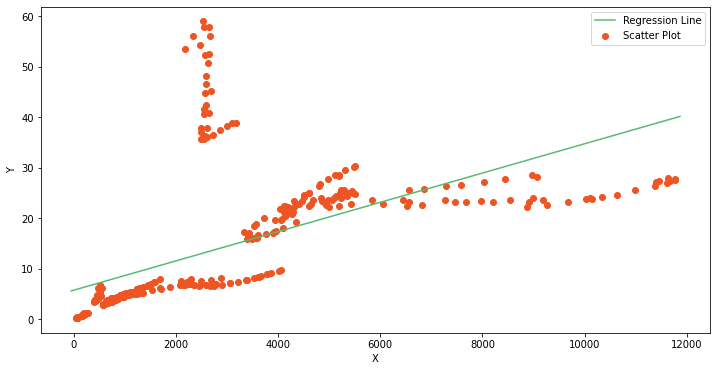

In [ ]:
    plt.figure(figsize=(12,6))
    X, Y = a,b
    max_x = np.max(X) + 100
    min_x = np.min(X) - 100
    x = np.linspace(min_x, max_x, 1000) 
    y = b0 + b1 * x
    plt.plot(x, y, color='#58b970', label='Regression Line')
    plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [ ]:
    X, Y = a,b
    rmse = 0
    n = len(X)
    for i in range(n):
        y_pred = b0 + b1 *X[i]
        rmse += (Y[i] - y_pred)**2
    rmse = round(np.sqrt(rmse/n),3)

In [ ]:
rmse

10.54

In [ ]:
    X, Y = a,b
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    n = len(X)
    ss_tot = 0
    ss_res = 0
    for i in range(n):
        y_pred = b0 + b1 *X[i]
        ss_tot += (Y[i] - mean_y)**2
        ss_res += (Y[i] - y_pred)**2
    r2 = round(1-(ss_res/ss_tot),3)

In [ ]:
r2

0.364

#MULTIPLE LINEAR REGRESSION

PREPROCESSING

In [ ]:
X= df.drop(['suicides/100k pop', 'suicides_no'], axis=1) 
y = df['suicides/100k pop']

NameError: ignored

In [ ]:
X.columns.values

NameError: ignored

In [ ]:
X[' gdp_for_year ($) '] = X[' gdp_for_year ($) '].str.replace(',', '').astype(float)

In [ ]:
X.dtypes

In [ ]:
X=pd.get_dummies(X,columns=['country','sex','age','generation'])

In [ ]:
X

In [ ]:
X.dtypes

In [ ]:
import matplotlib.pyplot as plt


  outlier detection

In [ ]:
import seaborn as sns

In [ ]:
sns.boxplot(x=y);

In [ ]:
from numpy import mean
from numpy import std

In [ ]:
m,s=mean(y),std(y)

In [ ]:
print("mean=",m)
print("std=",s)

In [ ]:
cutoff=s*3
lower, upper= m-cutoff, m+cutoff

In [ ]:
lower

In [ ]:
upper

In [ ]:
outliers=[x for x in y if (x<lower) or (x>upper)]

In [ ]:
z=[x for x in y if (x>lower) and (x<upper)]  #removed outliers

In [ ]:
X=X[y<69.69]


In [ ]:
sns.boxplot(x=z);

In [ ]:
X.dtypes

In [ ]:

x=X.values
y=np.array(z)

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)

In [ ]:
  y_pred = regressor.predict(X_test)
  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_test, y_pred)
  rmse=np.sqrt(mse)

In [ ]:
print(rmse)

In [ ]:
r2_score = regressor.score(X_test, y_test)

In [ ]:
print(r2_score)

## DECISION TREE REGRESSION

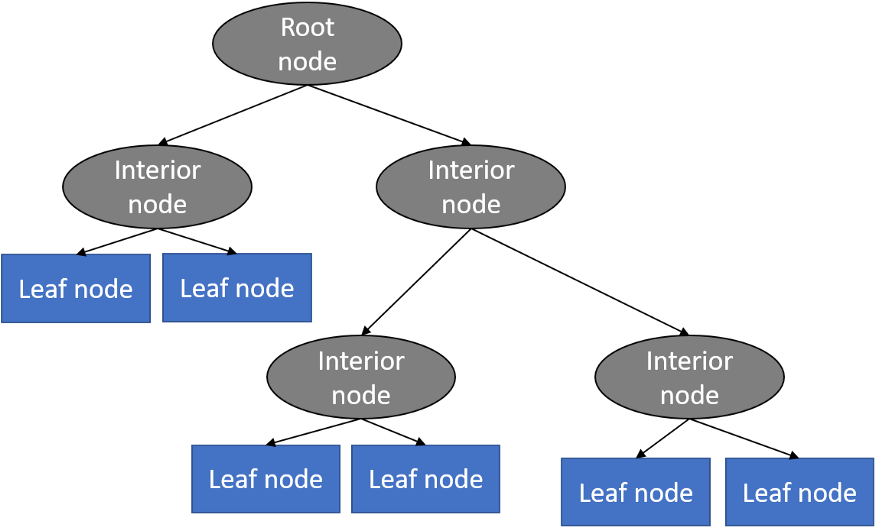

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)
y_pred_test=reg.predict(X_test)
y_pred_train=reg.predict(X_train)

In [ ]:
rms_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
rms_train=np.sqrt(mean_squared_error(y_train,y_pred_train))

print('RMSE of testing set: '+rms_test.astype(str))

In [ ]:
r2_score = reg.score(X_test, y_test)
r2_score

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 26)
for n in depth:
    reg = DecisionTreeRegressor(max_depth=n)
    reg.fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))


plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()